<a href="https://colab.research.google.com/github/VolkiTheDreamer/PythonRocks/blob/master/Keras_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip -q install ipython-autotime
%load_ext autotime

time: 622 µs (started: 2024-09-17 14:03:45 +00:00)


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

time: 721 µs (started: 2024-09-17 14:03:45 +00:00)


# Intro

TF 2'den beri resmi API keras olduğu için TF kruduğunda ayrıca Keras kurmaya gerek kalmıyor, tensorflow içinden doğrudan çağırabiliyosun.

bi ara AtuoKreas bakalım

In [ ]:
import tensorflow as tf
import keras

time: 1.98 ms (started: 2024-09-17 14:04:06 +00:00)


In [ ]:
tf.version.VERSION
keras.__version__

'2.17.0'

'3.4.1'

time: 20.6 ms (started: 2024-09-17 14:03:53 +00:00)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.constraints import max_norm

time: 5.25 ms (started: 2024-09-17 14:04:12 +00:00)


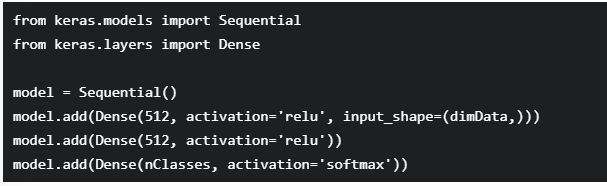

In [ ]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2)) #bunlar ne

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

time: 101 ms (started: 2024-09-17 14:09:07 +00:00)


In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')
model

time: 15.7 ms (started: 2024-09-17 14:09:15 +00:00)


In [ ]:
#veya
model = Sequential(
    [
        Dense(2, activation="relu", name="layer1"),
        Dense(3, activation="relu", name="layer2"),
        Dense(4, name="layer3"),
    ]
)
model

<Sequential name=sequential_2, built=False>

time: 20.4 ms (started: 2024-09-17 14:10:07 +00:00)


In [ ]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

başka bir kod örneği

In [ ]:
def create_model(train_set_size, input_length, num_epochs, batch_size):
    model = Sequential()
    model.add(Dense(7, input_dim=input_length, activation='softplus'))
    model.add(Dense(3, activation='softplus'))
    model.add(Dense(1, activation='softplus'))

    lr = .001
    adam0 = Adam(lr = lr)

    # Modeli derleyip ve daha iyi bir sonuç elde edildiğinde ağırlıkları kaydedelim
    model.compile(loss='binary_crossentropy', optimizer=adam0, metrics=['accuracy'])
    filepath = 'weights.best.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    history_model = model.fit(X_train[:train_set_size], Y_train[:train_set_size], callbacks=callbacks_list, epochs=num_epochs, batch_size=batch_size, verbose=0) #40, 32
    return model, history_model

def plots(history):
    loss_history = history.history['loss']
    acc_history = history.history['acc']
    epochs = [(i + 1) for i in range(num_epochs)]

    ax = plt.subplot(211)
    ax.plot(epochs, loss_history, color='red')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error Rate\n')
    ax.set_title('Error Rate per Epoch\n')

    ax2 = plt.subplot(212)
    ax2.plot(epochs, acc_history, color='blue')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy\n')
    ax2.set_title('Accuracy per Epoch\n')

    plt.subplots_adjust(hspace=0.8)
    plt.savefig('Accuracy_loss.png')
    plt.close()

def test(batch_size):
    test = pd.read_csv('test.csv', header=0)
    test_ids = test['PassengerId']
    test = preprocess(test)
    group_titles(test)
    testdata, _ = data_subset(test)

    X_test = np.array(testdata).astype(float)

    output = model.predict(X_test, batch_size=batch_size, verbose=0)
    output = output.reshape((418,))

    # Sonuçları ondalık sayı yerine 0-1 olarak değiştirebilirsiniz
    #outputBin = np.zeros(0)
    #for element in output:
    #    if element <= .5:
    #         outputBin = np.append(outputBin, 0)
    #    else:
    #        outputBin = np.append(outputBin, 1)
    #output = np.array(outputBin).astype(int)

    column_1 = np.concatenate((['PassengerId'], test_ids ), axis=0 )
    column_2 = np.concatenate( ( ['Survived'], output ), axis=0 )

    f = open("output.csv", "w")
    writer = csv.writer(f)
    for i in range(len(column_1)):
        writer.writerow( [column_1[i]] + [column_2[i]])
    f.close()

## model kaydetme

In [ ]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')

## Model değerleme

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
loss = model.history.history['loss'] #dictionary
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

## Optimizerlar
asdasda
dasda

Optimizer denen olay: gradient descenti nasıl çalıştırayım

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

diğer optimizaerları kullanmak için (sanırım!) from keras.optimizers import Adam gibi bişey diyoruz

weightleri artırcaz mı azaltcaz mınının karaını bu formüle göre.

## Aktivasyon fonksiyonları

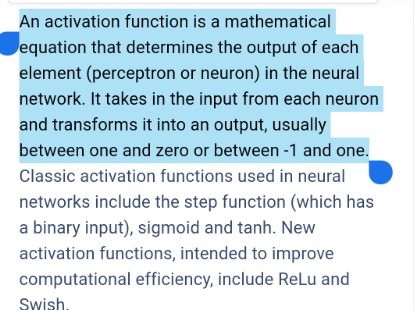

genelde reul veya tanh in hiddens. outputta ise, binarylerde sigmodi.

Normalizeler yani -1 ile 1 arasına sıkışan aktşvayonlards thresh ortası galiba, mantıklı, ama relu v.a için thrashold ne? Araştır

Sanırım bunlarda threshold yok, sadece step functionda var. sigmoid v.s ise çıkan değr neyse olduğu gibi gönderiyor gibi, mı acaba?

relu, hız açısından en iyisi, leaky relu de olabiliyor,

## Backpropagation ve gradient descent ve ağırlıklar

başlangıç değerli 0 seçilmemeli, yoksa nöronda hesaplanan Z değerleri aynı oluyor ve nöronlar farklı bişey öğrenmemiş oluyor, halbuki her nöronun farlı şey öğrenmesin bekliyoruz. o yüzden random seçmek iyidir. zatenb kerasta bu parametrede uniform yazıyor, yani 0-1 arasında normal dağılıma göre random sçeilyior


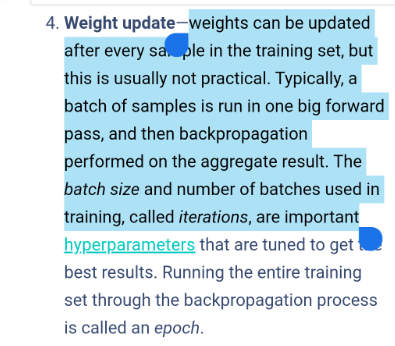

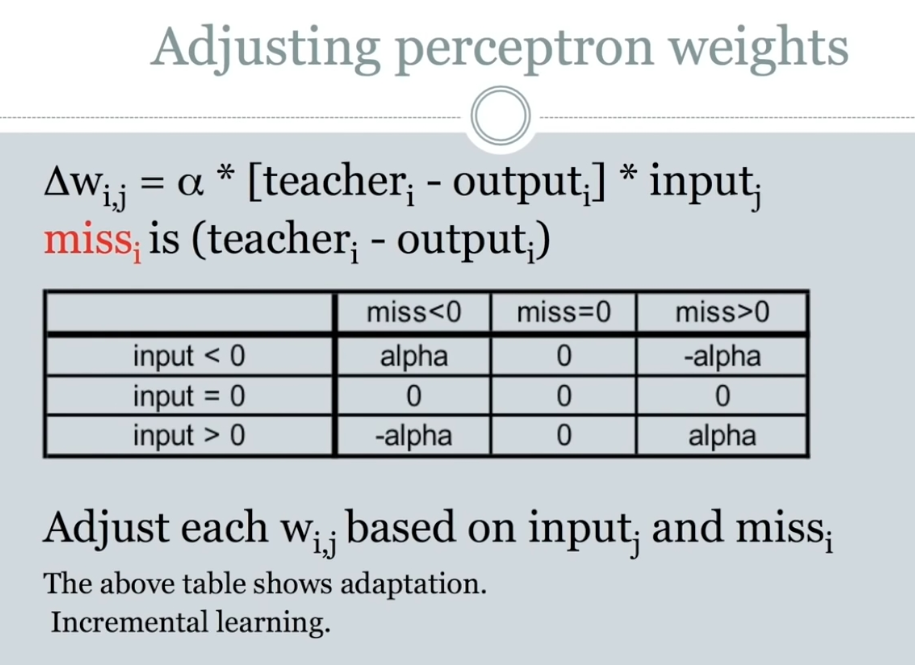

## Loss fonkisyonları

Binary cross entropy formülü bazı durumlarda sonsuz çıkıyor ya, bundan emin miyiz, blurbroenda normal arlsıklarda losslar vardı.

sanırım bluborwnda basit olsun diye fark alıp karesini alıyor. halbuki gerçekte log fonks bakmalı. bu arada sklearn implmtnasyonunda sonsuz çıkmaması için küçük bir değer ekleniyor 10^-15 gibi. böylece sonsuz çıkmıyor.

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

https://stats.stackexchange.com/questions/408374/binary-cross-entropy-plugging-in-probability-0

https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451

**Why Use a One Hot Encoding?**

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’

In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.

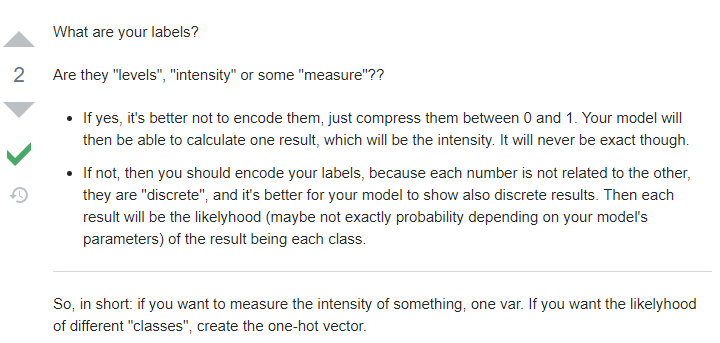

One hot encoding gives you ability to estimate probability of each class. Network will never give you same for single real or integer number class encoding. If you have similar classes 1 and 5 and network may confuse between them, it will give you mean result, and it will be some number between 1 and 5, and it may be 2,3 or 4 and anything in between, but these numbers encodes your classes, so it will be completely wrong output.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

This is called one hot encoding or creating dummy variables from a categorical variable.

# Tensorboard

https://colab.research.google.com/drive/1k6lqGvwX5UossXLZe8rCk4ymHGggtf4c

Jose'nin ML eğitimindeki ANN altındaki son video buna ait, tekrar izle